In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.replace('?', pd.NA, inplace=True)
df_cleaned = df.dropna(axis=1)

In [81]:
df_cleaned.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data information

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# Checking for Null Values

In [5]:
df_cleaned.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Data Visualization

<Axes: xlabel='class', ylabel='count'>

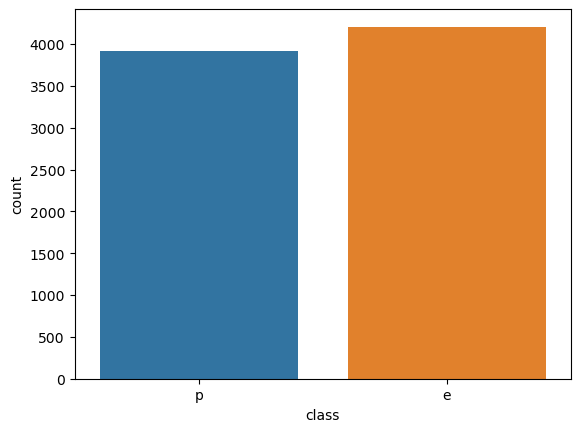

In [6]:
sns.countplot(data=df_cleaned,x='class')

In [7]:
sort=df_cleaned.describe().transpose().reset_index().sort_values(by='unique')

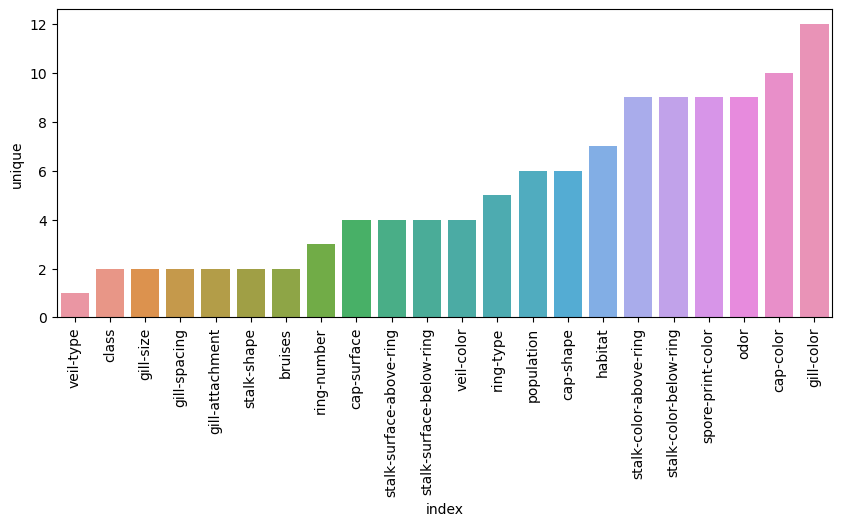

In [8]:
plt.figure(figsize=(10,4))
sns.barplot(data=sort,x='index',y='unique')
plt.xticks(rotation=90);

In [29]:
x=df_cleaned.drop('class',axis=1)

(8124, 21)

In [10]:
y=df_cleaned['class']

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model=RandomForestClassifier()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=101)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [16]:
encoder=OneHotEncoder()
categories=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat']

In [17]:
pipe=Pipeline([('encoder',encoder),('model',model)])

In [18]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('model', RandomForestClassifier())])

In [19]:
y_pred=pipe.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
acc=accuracy_score(y_test,y_pred)

In [22]:
acc

1.0

<Axes: >

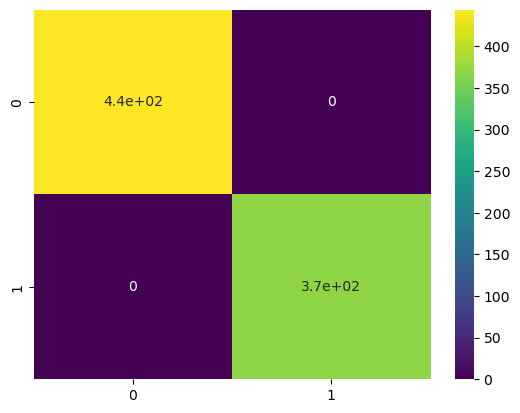

In [37]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [42]:
pipe.fit(x,y)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('model', RandomForestClassifier())])

In [43]:
import pickle
with open('trained_model1.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)

In [44]:
with open('trained_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [45]:
values = [['x','s','y','t','a','f','c','b','k','e','s','s','w','w','p','w','o','p','n','n','g']]
pred_class=loaded_model.predict(values)
if pred_class=='e':
    print('Mashroom is Edible')
else:
    print('Mashroom is Poisonous')

Mashroom is Edible


C:\Users\Sam\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [79]:
x['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [51]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')